<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
  * [1.1.Original Data & Standardization](#1.1)
  * [1.2.All features & Standardization](#1.2)  
  * [1.3.Features selected & Standardization](#1.3)   
* [2. Rerun the model on selected Features](#2)  
  * [2.1.Correlation Heatmap](#2.1)
      * [2.1.1 Removing correlated features](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC

<a id='1'></a>
#  <font color=darkgreen>1.Import the Data </font>
<a id='1.1'></a>
###  <font color=green>1.1. Original Data </font>
Let’s load the previous data and results from previous notebook 2

In [3]:
data_train = pd.read_csv("train.csv")

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [4]:
df_original = data_train.copy()

In [5]:
data_train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [6]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)

In [7]:
data_test.shape

(565892, 55)

In [8]:
column_list = data_train.columns
num  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
cat= [column for column in column_list if column not in num]

In [9]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<a id='1.2'></a>
## <font color=green> 1.2.All features & Standardization  <font>
 
Due to excel import, it transforms a new column unnamed

In [10]:
import pandas as pd
all_feat_df = pd.read_csv("all_features_data_train.csv")
all_feat_df = all_feat_df[all_feat_df.columns.drop(list(all_feat_df.filter(regex='Unnamed:')))]
pd.set_option('display.max_columns', None)
all_feat_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Elevation_x_Aspect,Elevation_x_Slope,Elevation_x_Horizontal_Distance_To_Hydrology,Elevation_x_Vertical_Distance_To_Hydrology,Elevation_x_Horizontal_Distance_To_Roadways,Elevation_x_Hillshade_9am,Elevation_x_Hillshade_Noon,Elevation_x_Hillshade_3pm,Elevation_x_Horizontal_Distance_To_Fire_Points,Aspect_x_Slope,Aspect_x_Horizontal_Distance_To_Hydrology,Aspect_x_Vertical_Distance_To_Hydrology,Aspect_x_Horizontal_Distance_To_Roadways,Aspect_x_Hillshade_9am,Aspect_x_Hillshade_Noon,Aspect_x_Hillshade_3pm,Aspect_x_Horizontal_Distance_To_Fire_Points,Slope_x_Horizontal_Distance_To_Hydrology,Slope_x_Vertical_Distance_To_Hydrology,Slope_x_Horizontal_Distance_To_Roadways,Slope_x_Hillshade_9am,Slope_x_Hillshade_Noon,Slope_x_Hillshade_3pm,Slope_x_Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology_x_Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology_x_Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Hydrology_x_Hillshade_9am,Horizontal_Distance_To_Hydrology_x_Hillshade_Noon,Horizontal_Distance_To_Hydrology_x_Hillshade_3pm,Horizontal_Distance_To_Hydrology_x_Horizontal_Distance_To_Fire_Points,Vertical_Distance_To_Hydrology_x_Horizontal_Distance_To_Roadways,Vertical_Distance_To_Hydrology_x_Hillshade_9am,Vertical_Distance_To_Hydrology_x_Hillshade_Noon,Vertical_Distance_To_Hydrology_x_Hillshade_3pm,Vertical_Distance_To_Hydrology_x_Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways_x_Hillshade_9am,Horizontal_Distance_To_Roadways_x_Hillshade_Noon,Horizontal_Distance_To_Roadways_x_Hillshade_3pm,Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points,Hillshade_9am_x_Hillshade_Noon,Hillshade_9am_x_Hillshade_3pm,Hillshade_9am_x_Horizontal_Distance_To_Fire_Points,Hillshade_Noon_x_Hillshade_3pm,Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points,Hillshade_3pm_x_Horizontal_Distance_To_Fire_Points,Constant Term,Elevation^2,Aspect^2,Slope^2,Horizontal_Distance_To_Hydrology^2,Vertical_Distance_To_Hydrology^2,Horizontal_Distance_To_Roadways^2,Hillshade_9am^2,Hillshade_Noon^2,Hillshade_3pm^2,Distance_To_Hydrology,sqr_Distance_To_Hydrology,Sqr_Horizontal_Distance_To_Roadways,SqrSlope,sqr_Horizontal_Distance_To_firepoints,Mean_Hillshade,Mean_Hillshade_bin,Mean_Hillshade_boxcox,Hillshade_9am_boxcox,Hillshade_Noon_boxcox,Hillshade_3pm_boxcox,sqr_Aspect,ratio_Hillshade_3pm,ratio_Hillshade_Noon,ratio_Hillshade_9am,Aspect_North,Aspect_East,Aspect_South,Aspect_West,Lower_Montane_Climate,Montane_Dry_Climate,Montane_Climate,Montane_Dry_and_Montane_Climate,Montante_and_Subalpine_Climate,Subalpine_Climate,Alpine_Climate,Alluvium_Soil,Glacial_Soil,Mixed_Sedimentary_Soil,Igneus_and_Metamorphic_Soil,Type_Stony,Type_Rubbly,Type_Other
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,132396,7788,669768,0,1323960,573716,602272,384208,16300284,153,13158,0,26010,11271,11832,7548,320229,774,0,1530,663,696,444,18837,0,131580,57018,59856,38184,1619982,0,0,0,0,0,112710,118320,75480,3202290,51272,32708,1387659,34336,1456728,929292,1.0,6739216.0,2601.0,9.0,66564.0,0.0,260100.0,48841.0,53824.0,21904.0,258.000000,16.062378,22.583180,1.732051,79.240141,200.333333,2.0,2.720721e+11,8.911160e+07,6.997710e+08,301.766934,7.141428,0.580392,0.909804,0.866667,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,145040,5180,549080,-15540,1010100,569800,608650,391090,16122750,112,11872,-336,21840,12320,13160,8456,348600,424,-12,780,440,470,302,12450,-1272,82680,46640,49820,32012,1319700,-2340,-1320,-1410,-906,-37350,85800,91650,58890,2427750,51700,33220,1369500,35485,1462875,939975,1.0,6708100.0,3136.0,4.0,44944.0,36.0,152100.0,48400.0,55225.0,22801.0,212.084889,14.563135,19.748418,1.414214,78.898669,202.000000,2.0,2.842424e+11,8.76

In [11]:
all_feat_df.shape

(15120, 103)

From 55 features, we engineered a total of 165 additional ones

For scaling we need to exclude the dummy variables 

In [14]:
column_list = all_feat_df.columns
numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
categorial= [column for column in column_list if column not in numerical]

In [15]:
X_all = all_feat_df.drop(['Cover_Type'], axis=1)
y_all = all_feat_df['Cover_Type']
column_list = X_all.columns

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all, y_all, test_size=0.20, random_state=37,stratify=y_all)
print("The shape of validation data:{} and {} ".format(X_val_all.shape,y_val_all.shape))
print("The shape of training data:{} and {} ".format(X_train_all.shape,y_train_all.shape))

The shape of validation data:(3024, 102) and (3024,) 
The shape of training data:(12096, 102) and (12096,) 


<a id='1.3'></a>
##  <font color=green>1.3. Selected Model after feature selection & Standardization </font>


Selected features from the feature selection are transferred to cvs and used for further analysis. 

In [16]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [17]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [18]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 23)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [19]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [20]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Splitting the data into train and validation test 

In [21]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 23) and (3024, 1) 
The shape of training data:(12096, 23) and (12096, 1) 


## <font color=red> Delete Trial after testing  <font>

In [22]:
X_train_new[scale_numerical] = scaler.fit_transform(X_train_new[scale_numerical])
X_val_new[scale_numerical] = scaler.fit_transform(X_val_new[scale_numerical])

In [23]:
y_train_new = y_train_new.values.ravel()
y_val_new = y_val_new.values.ravel()

In [24]:
X_train_new.head()

,Wilderness_Area4,Wilderness_Area3,Subalpine_Climate,Wilderness_Area1,Sqr_Horizontal_Distance_To_Roadways,Montane_Climate,Lower_Montane_Climate,Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways^2,Hillshade_9am_x_Hillshade_Noon,Elevation,Alpine_Climate,sqr_Horizontal_Distance_To_firepoints,Horizontal_Distance_To_Roadways_x_Hillshade_Noon,Horizontal_Distance_To_Roadways_x_Hillshade_9am,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points,Hillshade_9am_x_Horizontal_Distance_To_Fire_Points,Elevation_x_Horizontal_Distance_To_Roadways,Elevation_x_Horizontal_Distance_To_Hydrology,Elevation_x_Hillshade_Noon,Elevation^2
14128,0,1,0,0,0.351539,1,0,-0.355958,-0.140185,1.046918,0.459435,0,-0.572231,0.176073,0.354359,0.158238,-0.609228,-0.570085,-0.494131,0.142972,0.658113,0.528666,0.396138
4425,0,1,1,0,0.152898,0,0,-0.183207,-0.272236,-0.017435,0.284791,0,0.123186,0.039330,-0.133927,-0.036874,-0.049528,0.043341,-0.156657,-0.058976,-0.590804,0.629495,0.213158
909,0,0,1,1,2.135379,0,0,1.160432,2.994824,0.271679,0.425942,0,0.389338,2.708263,2.348524,2.538151,0.205616,0.321689,0.124347,2.249098,-0.039622,0.794554,0.360690
5123,0,1,0,0,0.585066,1,0,-0.136072,0.054393,1.259488,0.184311,0,-0.164924,0.470078,0.631833,0.405531,-0.300180,-0.230564,-0.158102,0.304061,-0.471462,0.476117,0.109966
10901,0,1,0,0,0.408937,1,0,-0.473838,-0.096535,-0.684005,-0.456850,0,-1.024894,0.188041,0.033686,0.217225,-0.890425,-0.863856,-0.916210,0.019453,-0.858030,-0.343713,-0.512665


In [76]:
#test a different dataframe
X_trial = pd.read_csv("X_trial.csv")
y_trial = pd.read_csv("y_trial.csv")

In [77]:
column_list = X_trial.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [78]:
X_trial = X_trial[X_trial.columns.drop(list(X_trial.filter(regex='Unnamed:')))]
y_trial = y_trial[y_trial.columns.drop(list(y_trial.filter(regex='Unnamed:')))]

In [79]:

X_train_newt, X_val_newt, y_train_newt, y_val_newt = train_test_split(X_trial, y_trial, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_trial.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(15120, 17) and (3024,) 
The shape of training data:(12096, 23) and (12096,) 


Running the correlation matrix, many of these features are correlated. I create another dataframe for only relevant features

I create a subsplit with a dataframe containing only these features instead, based on the split made above

<a id='2'></a>
# <font color=darkgreen> 2.Re-run models with the new selected features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 

In [25]:
# Create a dataFrame to compare performance of Classifier Models in the End
classifiers_compare = pd.DataFrame(columns =['Algorithm','Mean CV Score'])

<a id='2.1'></a>
## <font color=green> 2.Correlation Heatmap  <font>
Checking Correlation among features

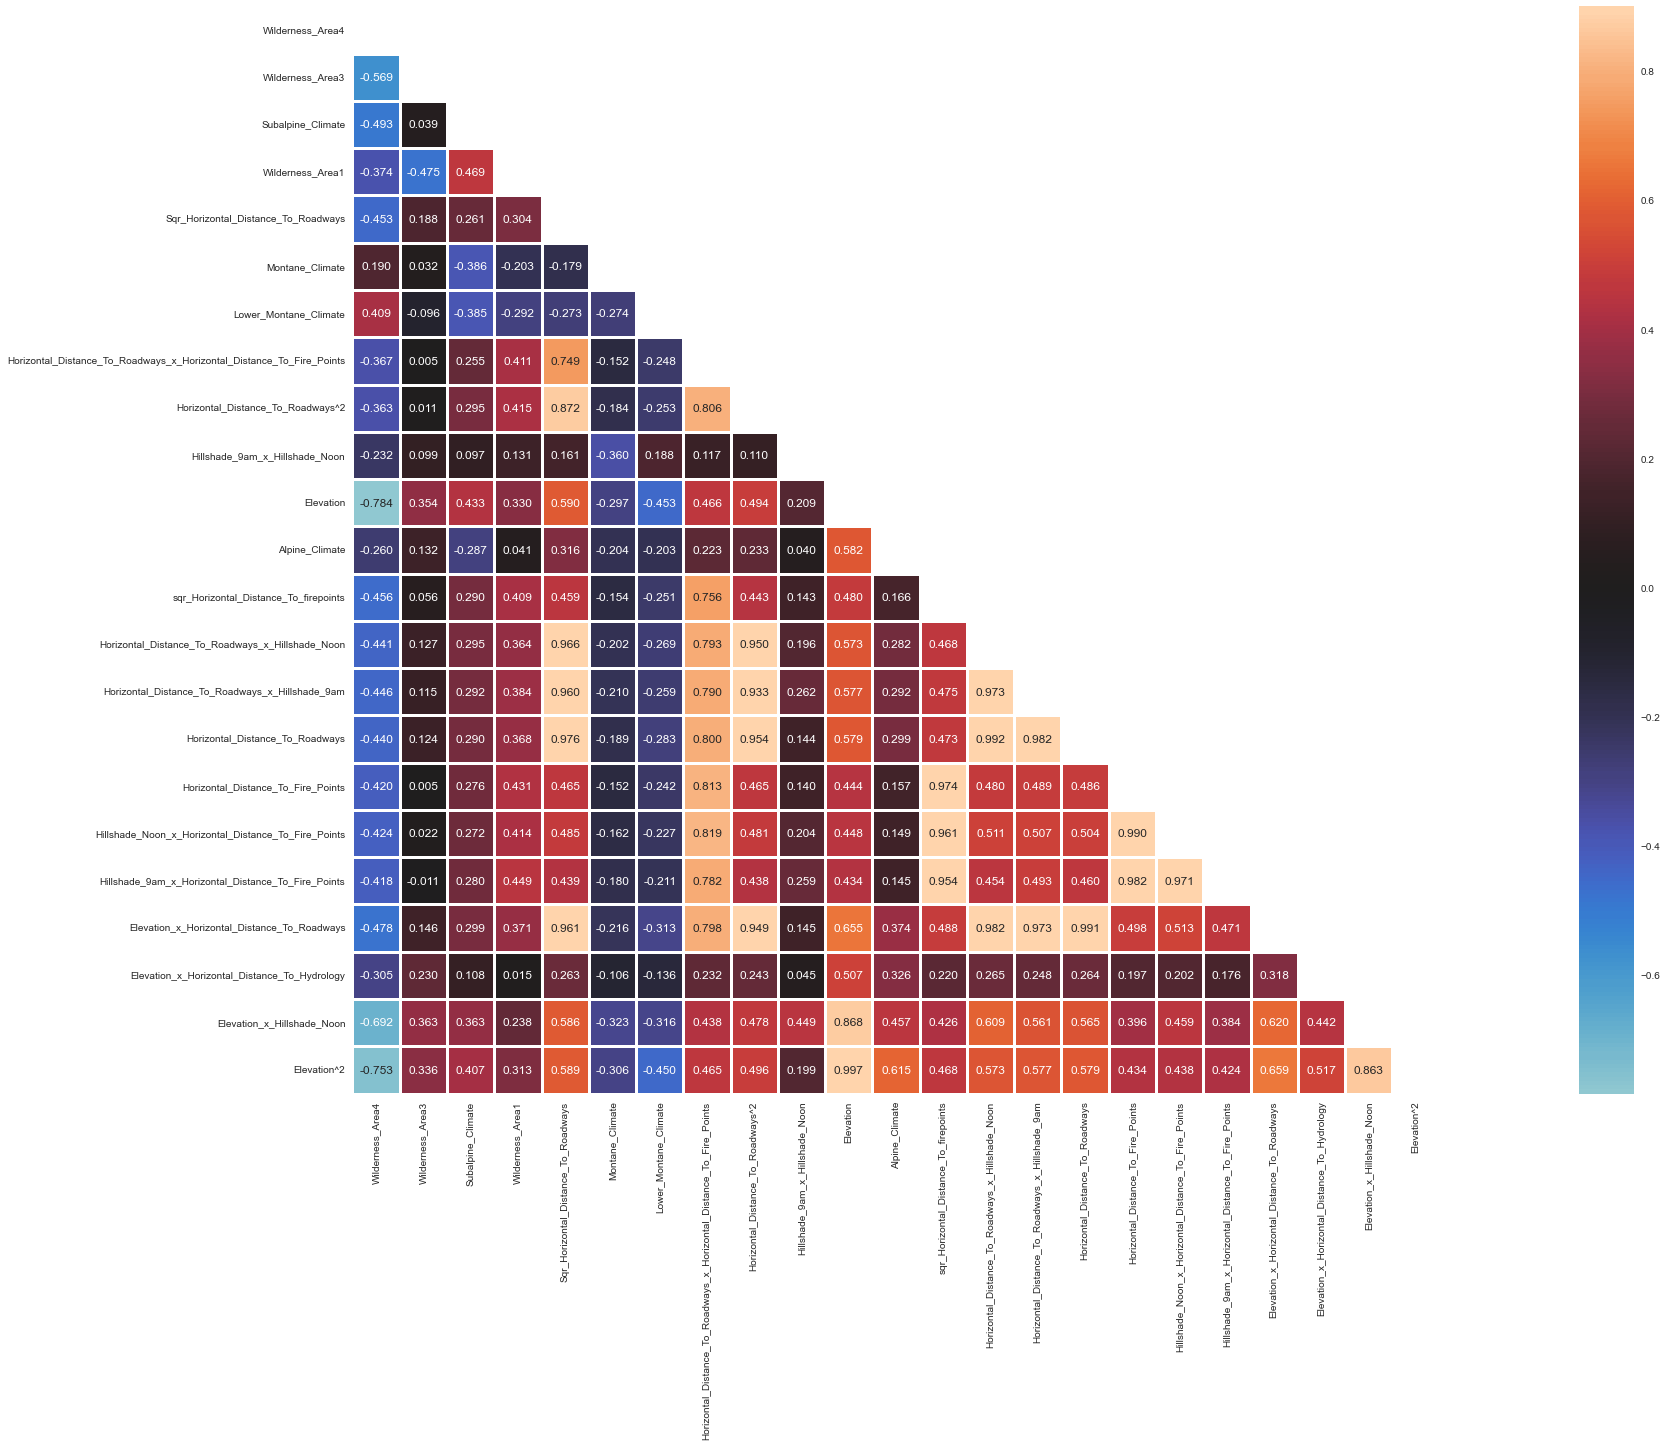

In [26]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

<a id='2.1.1'></a>
## <font color=green> 2.Removing autocorrelation <font>

Some of these features are heavily correlated one another, before running the models like Logistic Regression, where mutlicorrelaty is an issue, we should ensure, only relevant features are considered, taking a threshold of 0.7 these are:

- Wilderness Area 1 
- Subalpine Climate (synthetic)
- Wilderness Area 3
- Elevation
- Family Moran (synthetic)
- Soil Type 3
- Soil Type 12
- Rock outcrop complex (synthetic)
- Lower Montane Climate (synthetic)
- Family Catamount (synthetic)

TOTAL: 11 features

In [27]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

Remocing Collinearity Features for logistic Regression. 

In [28]:
df_logist = remove_collinear_features(X_selected1, 0.6)

Removed Columns {'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways_x_Hillshade_9am', 'Elevation_x_Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Roadways', 'Elevation_x_Hillshade_Noon', 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points', 'Elevation^2', 'Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points', 'Elevation', 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon', 'Horizontal_Distance_To_Roadways^2', 'Horizontal_Distance_To_Fire_Points', 'sqr_Horizontal_Distance_To_firepoints'}


In [29]:
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(df_logist, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 23) and (3024,) 
The shape of training data:(12096, 23) and (12096,) 


Done with correlation, time to fit the model

In [30]:
def plot_ROC_curve(model, X_train,y_train, X_val, y_val):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={1: 'Spruce/Fir', 
                                        2: 'Lodgepole Pine', 
                                        3: 'Ponderosa Pine',
                                       4: 'Cottonwood/Willow',
                                       5: 'Aspen',
                                       6: 'Douglas-fir',
                                       7: 'Krummholz'})

                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train,y_train)
    visualizer.score(X_val, y_val)
    visualizer.show()
    
    return visualizer

## <font color=green> 7.1. Decision Trees  <font>

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import xgboost
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from dtreeviz.trees import *
from sklearn.model_selection import GridSearchCV


In [32]:
def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


### <font color=green> 7.1.1. Single Tree <font>

### 7.1.1.1 No hyperparameters

In [33]:
single_tree = DecisionTreeClassifier(random_state=18)
model_tree = single_tree.fit(X_train_new, y_train_new)
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(single_tree, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 1.9202


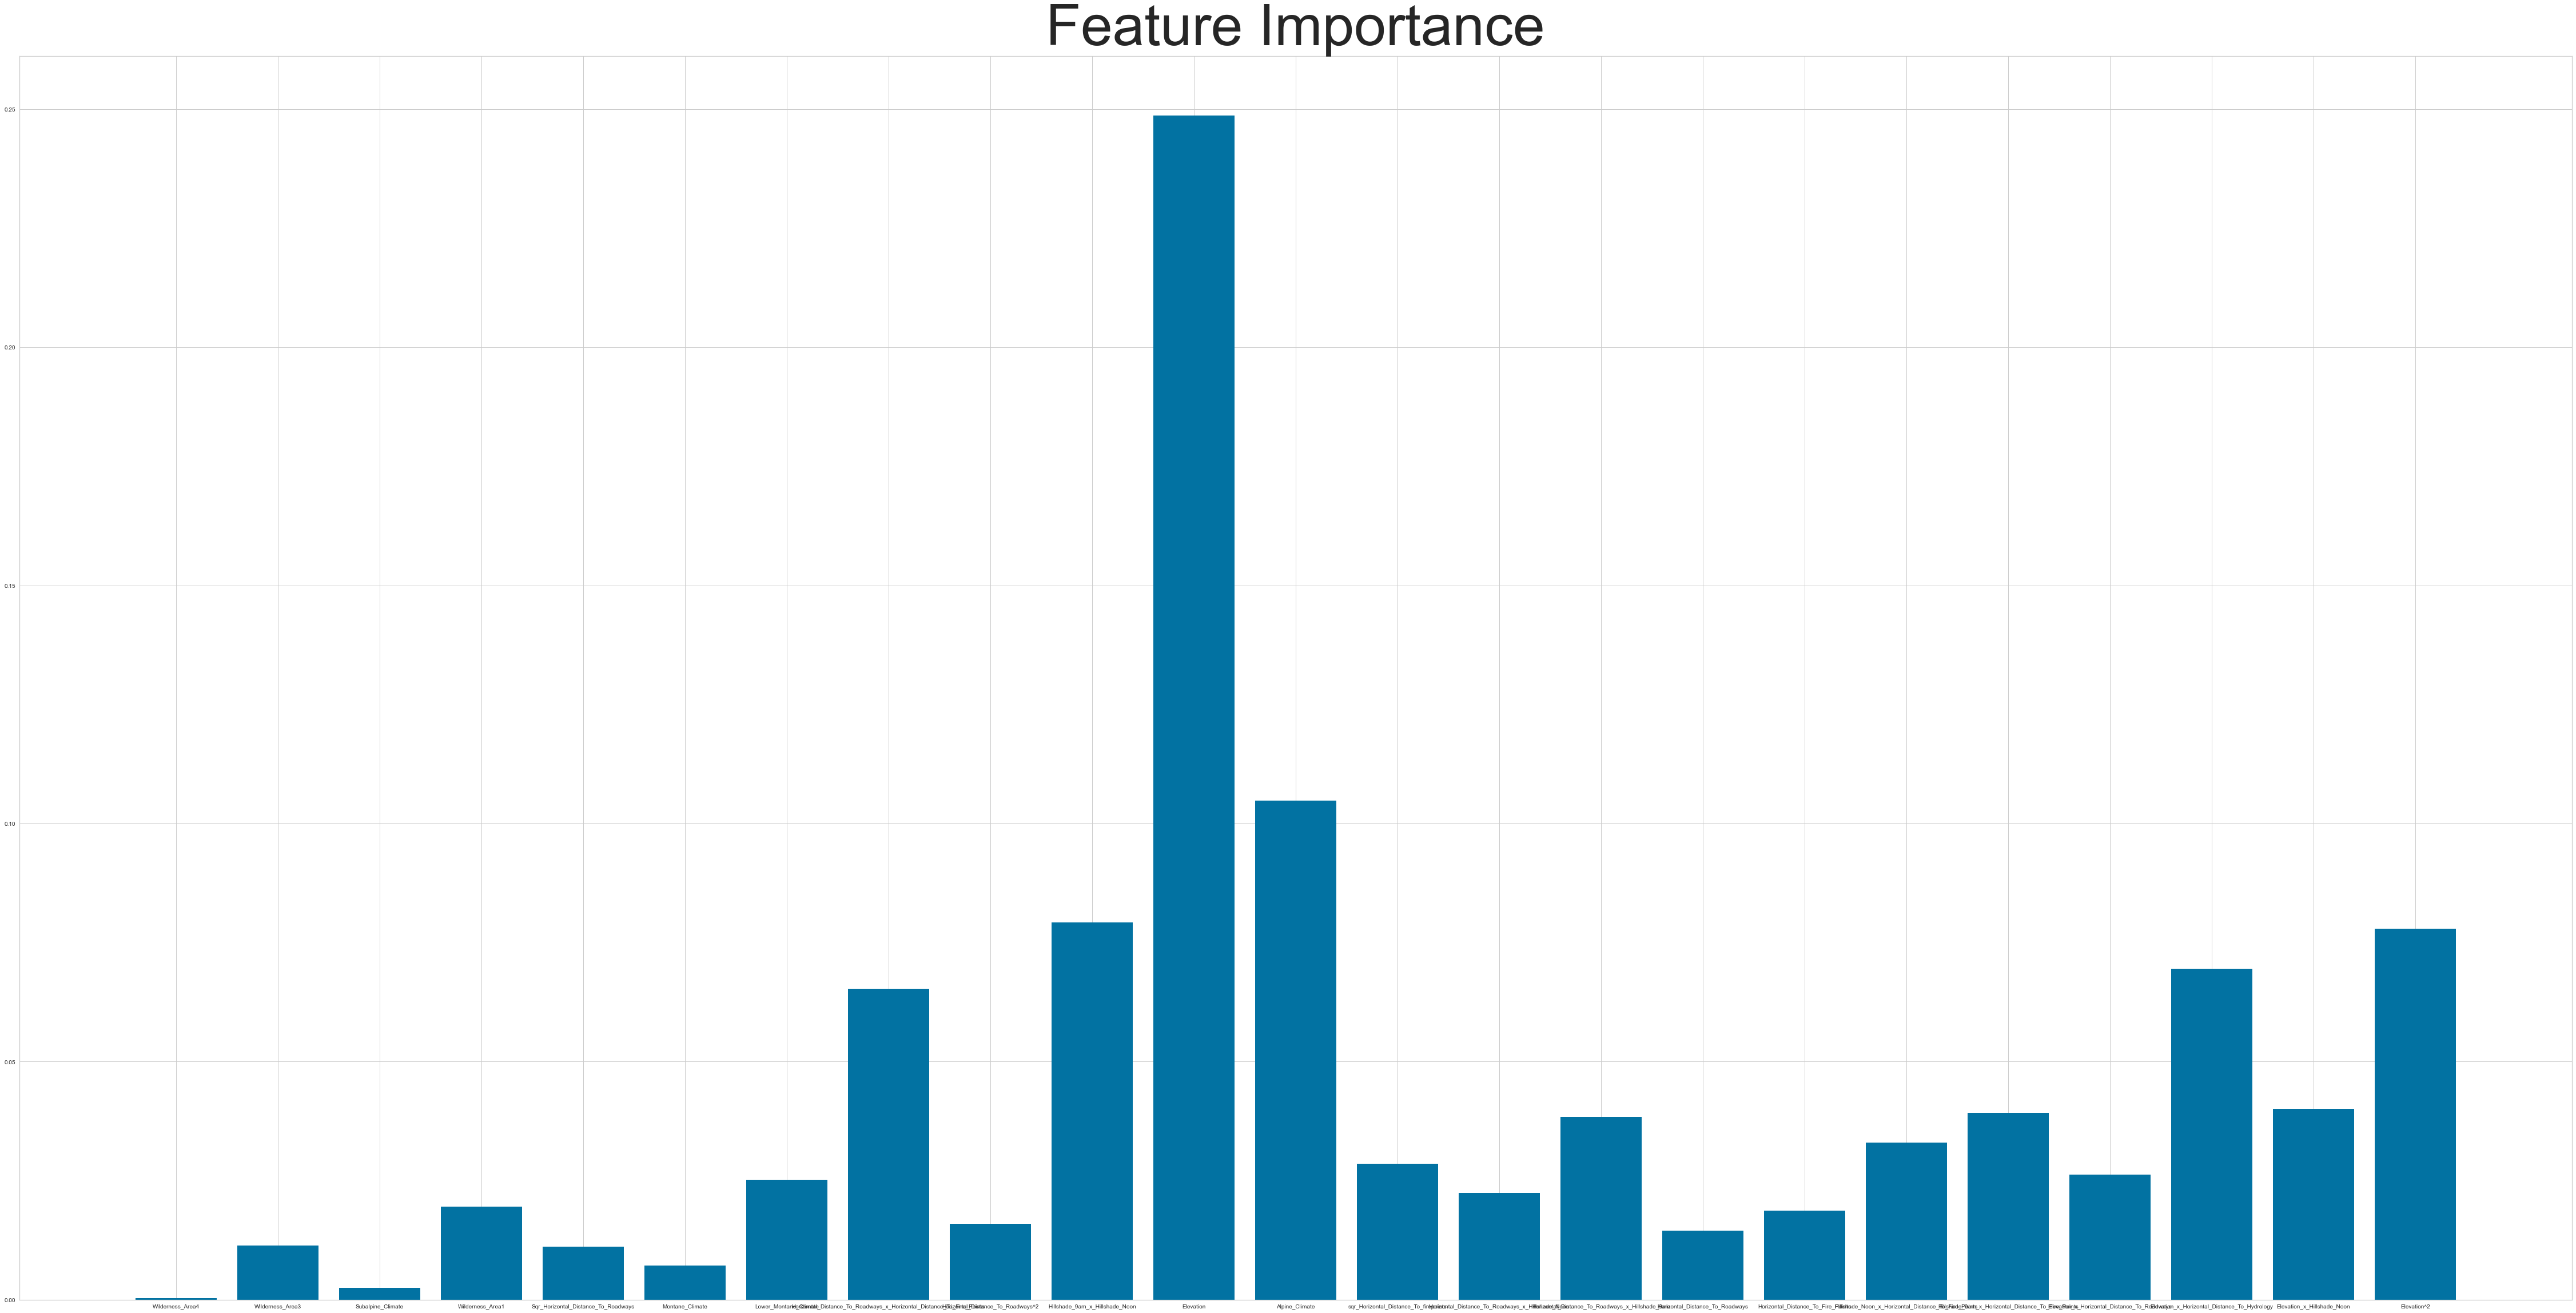

In [34]:
plt.figure(figsize=(80,40))
plt.bar(X_train_new.columns, single_tree.feature_importances_)
plt.title('Feature Importance', fontsize=100);

In [35]:
### 7.1.1.2 Hyperparameters A. Pruning the tree

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,30)}

single_tree_a = GridSearchCV(single_tree,
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=5, n_jobs=-1, verbose=1)

single_tree_a.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=18), n_jobs=-1,
             param_grid={'max_depth': range(1, 30)},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
print("Best parameters set found on development set:")
print()
print(single_tree_a.best_params_)
print()
print("Grid scores on development set:")
print()
means = single_tree_a.cv_results_['mean_test_score']
stds = single_tree_a.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, single_tree_a.cv_results_['params']):
    print("MSE = %0.3f (+/-%0.03f) for %r" % (-mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 16}

Grid scores on development set:

MSE = 9.744 (+/-0.114) for {'max_depth': 1}
MSE = 5.112 (+/-0.292) for {'max_depth': 2}
MSE = 3.499 (+/-0.314) for {'max_depth': 3}
MSE = 2.981 (+/-0.215) for {'max_depth': 4}
MSE = 2.835 (+/-0.150) for {'max_depth': 5}
MSE = 2.685 (+/-0.246) for {'max_depth': 6}
MSE = 2.466 (+/-0.339) for {'max_depth': 7}
MSE = 2.313 (+/-0.265) for {'max_depth': 8}
MSE = 2.151 (+/-0.236) for {'max_depth': 9}
MSE = 2.070 (+/-0.268) for {'max_depth': 10}
MSE = 2.008 (+/-0.253) for {'max_depth': 11}
MSE = 1.964 (+/-0.133) for {'max_depth': 12}
MSE = 1.971 (+/-0.173) for {'max_depth': 13}
MSE = 1.961 (+/-0.189) for {'max_depth': 14}
MSE = 1.892 (+/-0.160) for {'max_depth': 15}
MSE = 1.879 (+/-0.129) for {'max_depth': 16}
MSE = 1.931 (+/-0.240) for {'max_depth': 17}
MSE = 1.904 (+/-0.117) for {'max_depth': 18}
MSE = 1.922 (+/-0.142) for {'max_depth': 19}
MSE = 1.893 (+/-0.236) for {'max_depth': 20}
MSE = 1.92

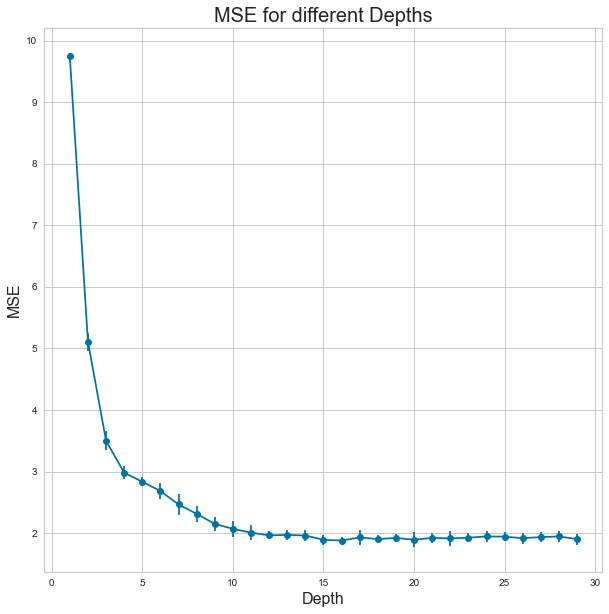

In [38]:
plt.figure(figsize=(10,10))
plt.errorbar(range(1,30,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16);

In [39]:
single_tree_d16 = DecisionTreeClassifier(random_state=18, max_depth=16)

print("MSE = {0:.4f}".format(-np.mean(cross_val_score(single_tree_d16, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 1.8789


In [40]:
### 7.1.1.3 Bagging

In [41]:
from sklearn.ensemble import RandomForestRegressor

tree_bagging = RandomForestRegressor(random_state=42, n_jobs=-1, max_features=len(X_train_new.columns))
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(tree_bagging, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 0.9992


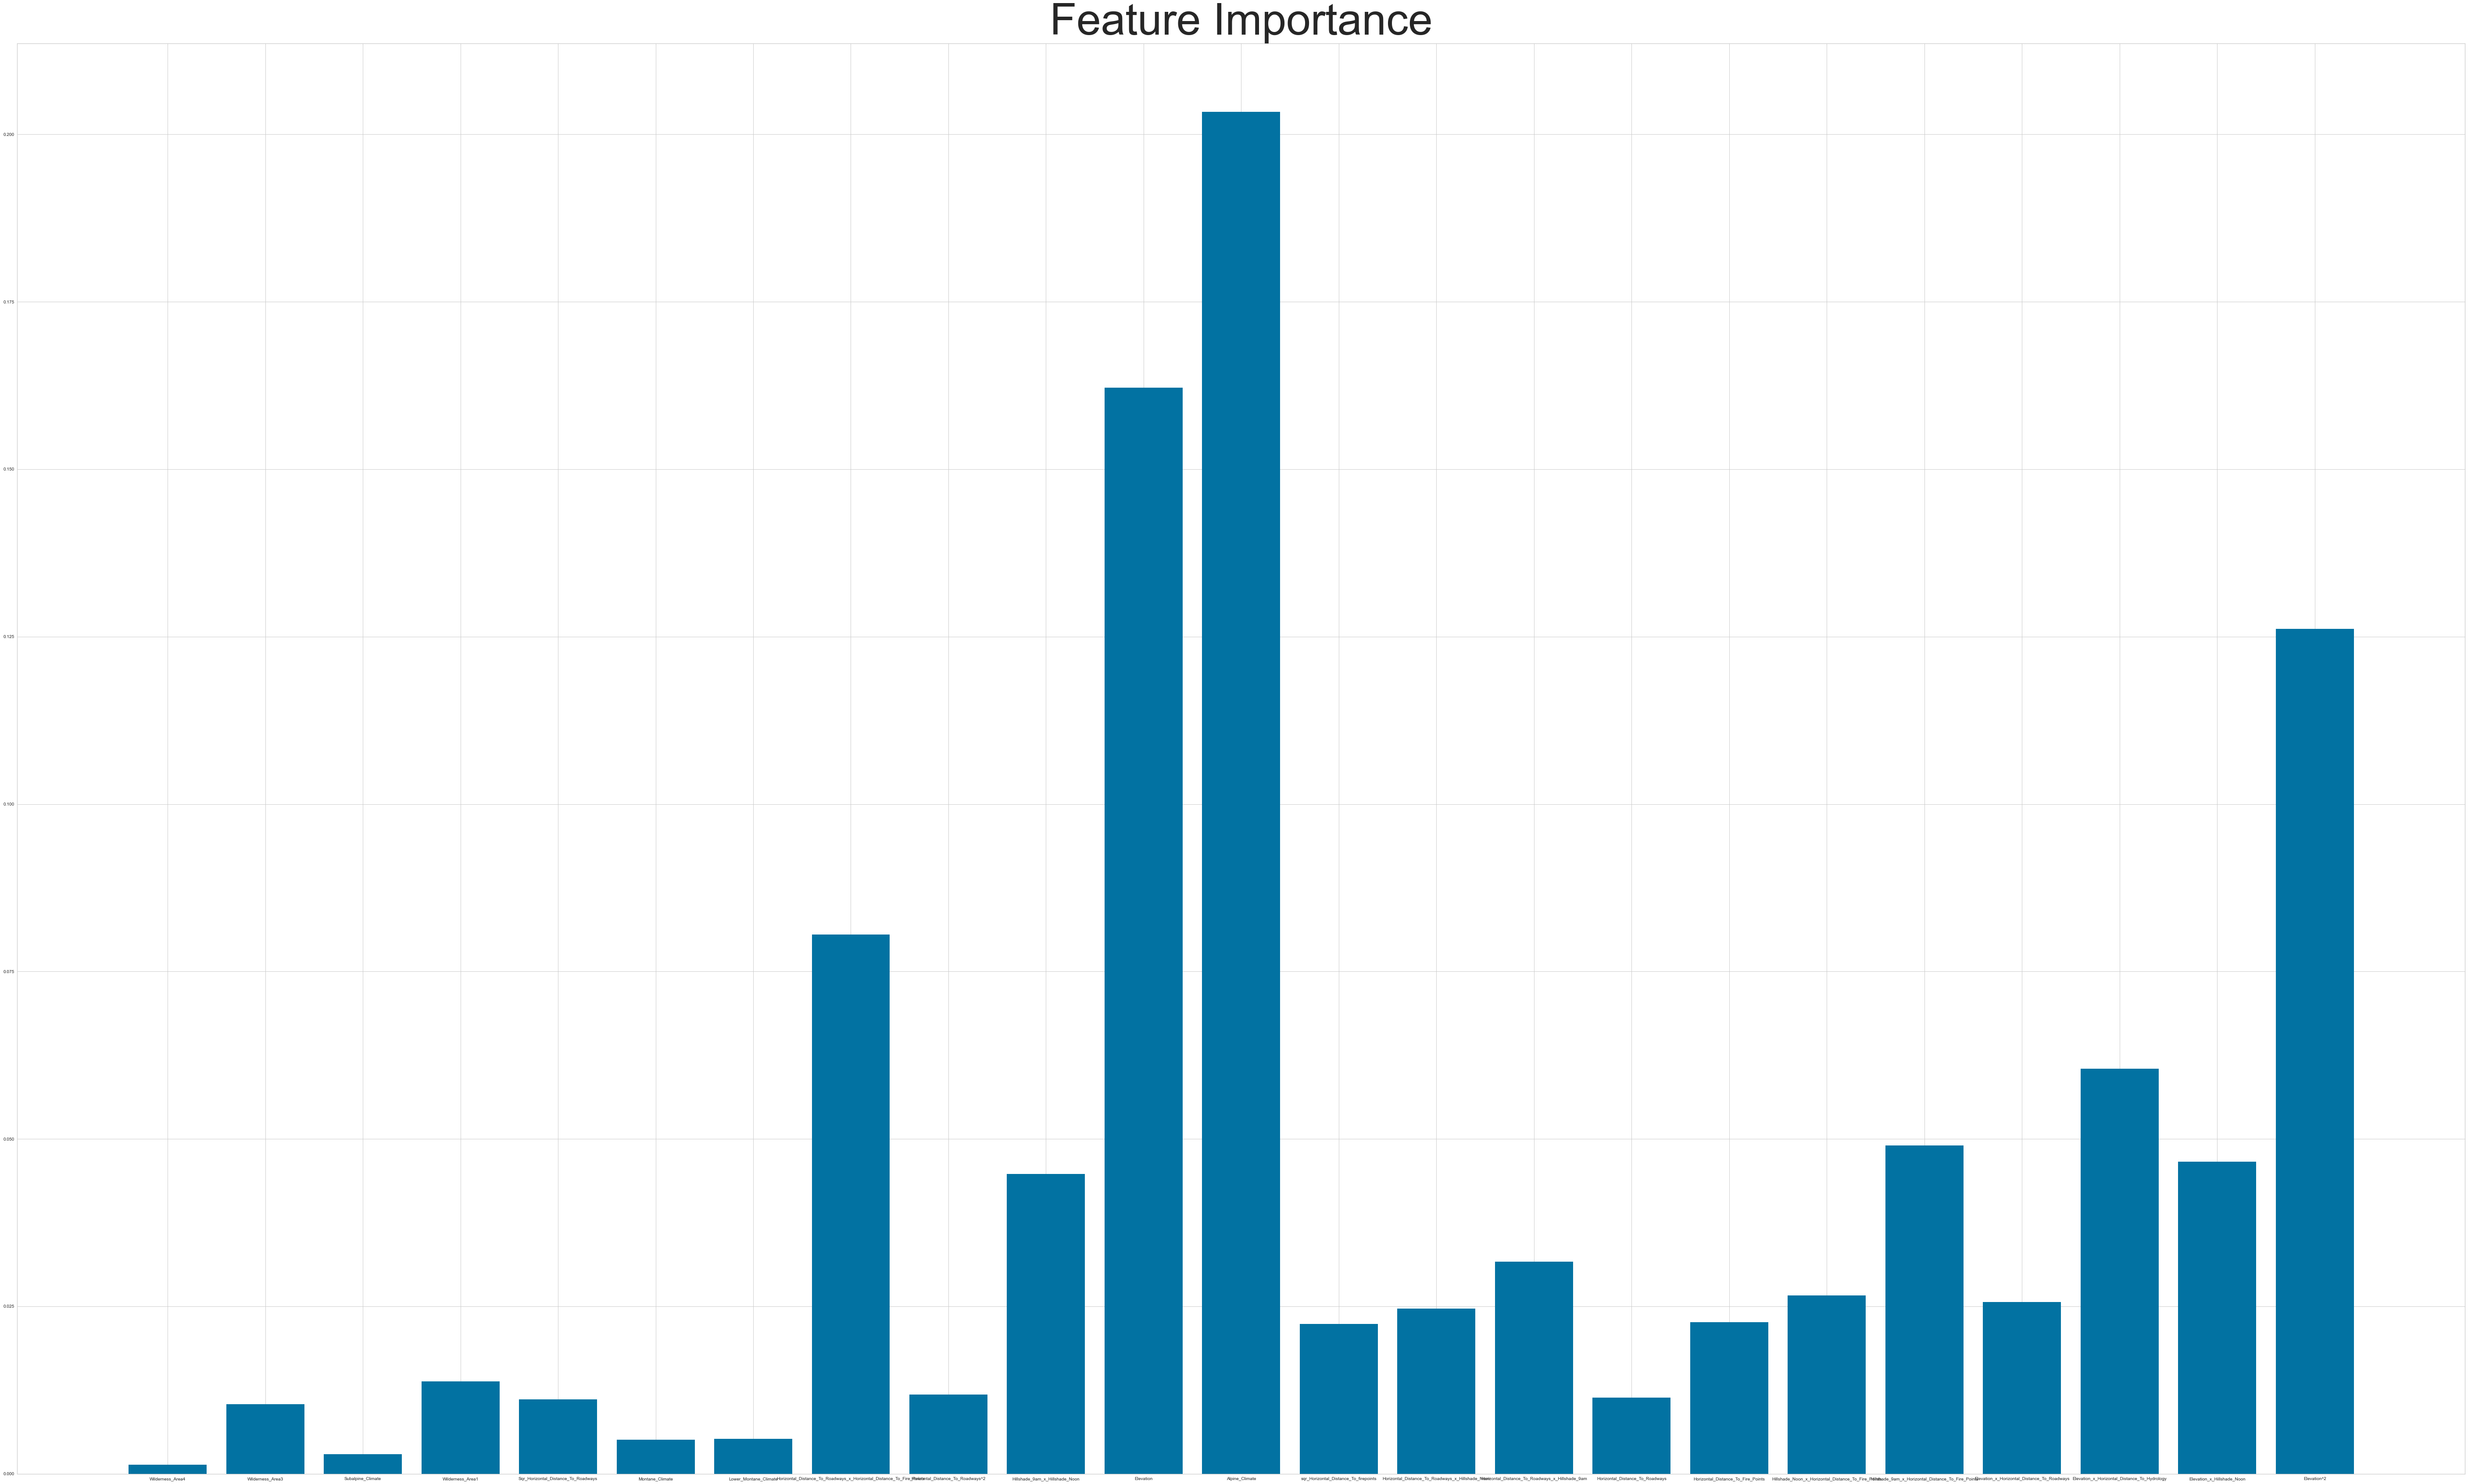

In [42]:
plt.figure(figsize=(100,60))
tree_bagging.fit(X_train_new,y_train_new)
plt.bar(X_train_new.columns, tree_bagging.feature_importances_)
plt.title('Feature Importance', fontsize=100);

In [43]:
random_forest = RandomForestRegressor(random_state=42, max_features='sqrt')
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(random_forest, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))

MSE = 0.9499


# Single Tree (Classifier)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree_classifier = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_classifier, X_train_new, y_train_new))))

Accuracy = 0.7722


## Cross-Validation for optimal size

In [46]:
param_grid = {'max_depth': range(1,30)}

tree_classifier_pruned_cv = GridSearchCV(tree_classifier, 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=1)

tree_classifier_pruned_cv.fit(X_train_new,y_train_new)
print("Best parameters set found on development set:")
print()
print(tree_classifier_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree_classifier_pruned_cv.cv_results_['mean_test_score']
stds = tree_classifier_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree_classifier_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Best parameters set found on development set:

{'max_depth': 28}

Grid scores on development set:

Accuracy = 0.286 (+/0.001) for {'max_depth': 1}
Accuracy = 0.459 (+/0.006) for {'max_depth': 2}
Accuracy = 0.628 (+/0.015) for {'max_depth': 3}
Accuracy = 0.666 (+/0.015) for {'max_depth': 4}
Accuracy = 0.686 (+/0.017) for {'max_depth': 5}
Accuracy = 0.707 (+/0.010) for {'max_depth': 6}
Accuracy = 0.725 (+/0.008) for {'max_depth': 7}
Accuracy = 0.739 (+/0.015) for {'max_depth': 8}
Accuracy = 0.749 (+/0.010) for {'max_depth': 9}
Accuracy = 0.756 (+/0.008) for {'max_depth': 10}
Accuracy = 0.762 (+/0.011) for {'max_depth': 11}
Accuracy = 0.764 (+/0.004) for {'max_depth': 12}
Accuracy = 0.767 (+/0.008) for {'max_depth': 13}
Accuracy = 0.769 (+/0.014) for {'max_depth': 14}
Accuracy = 0.772 (+/0.010) for {'max_depth': 15}
Accuracy = 0.769 (+/0.006) for {'max_depth': 16}
Accuracy = 0.771 (+/0.007) for {'max_depth': 17}
Accuracy = 0.77

Best Accuracy with depth 24 --> 0.779

In [47]:
tree_classifier_pruned = DecisionTreeClassifier(random_state=42, max_depth=24)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_classifier_pruned, X_train_new, y_train_new))))

Accuracy = 0.7716


## XGBoost

In [48]:
#!pip install xgboost

In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

#import warnings
#warnings.filterwarnings('ignore')

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1t = le.fit_transform(y_train_newt.values.ravel())

In [85]:
y_val1t = le.fit_transform(y_val_newt.values.ravel())

In [52]:
## First run, hyperparameters

In [53]:
xgboost = xgb.XGBClassifier(learning_rate=0.1, gamma=5, alpha=1, max_depth=2, verbosity=0, random_state=42, n_jobs=-1)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost, X_train_new, y_train1))))

Accuracy = 0.7274


Best model

In [93]:
xgboost2 = xgb.XGBClassifier (missing=np.nan, max_depth=7, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost2, X_train_new, y_train1))))

Accuracy = 0.8364


In [92]:
# fitting
xgboost2.fit(X_train_new, y_train1, early_stopping_rounds=40, eval_metric="merror", eval_set=[(X_val_new, y_val1)])
pred = xgboost2.predict(X_val_new)

accuracy = accuracy_score(y_val1t, pred);
print ('accuracy:%0.2f%%'%(accuracy*100))

[0]	validation_0-merror:0.27315


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-merror:0.26455
[2]	validation_0-merror:0.24636
[3]	validation_0-merror:0.24537
[4]	validation_0-merror:0.24140
[5]	validation_0-merror:0.23743
[6]	validation_0-merror:0.23743
[7]	validation_0-merror:0.23313
[8]	validation_0-merror:0.23512
[9]	validation_0-merror:0.23512
[10]	validation_0-merror:0.23446
[11]	validation_0-merror:0.23049
[12]	validation_0-merror:0.22983
[13]	validation_0-merror:0.23016
[14]	validation_0-merror:0.22884
[15]	validation_0-merror:0.22950
[16]	validation_0-merror:0.23016
[17]	validation_0-merror:0.23148
[18]	validation_0-merror:0.23016
[19]	validation_0-merror:0.23082
[20]	validation_0-merror:0.23214
[21]	validation_0-merror:0.23082
[22]	validation_0-merror:0.23082
[23]	validation_0-merror:0.23115
[24]	validation_0-merror:0.22917
[25]	validation_0-merror:0.22884
[26]	validation_0-merror:0.22718
[27]	validation_0-merror:0.22685
[28]	validation_0-merror:0.22784
[29]	validation_0-merror:0.22751
[30]	validation_0-merror:0.22652
[31]	validation_0-m

In [56]:
#XGBOOST2

# fit the model with the training data
xgboost2.fit(X_train_new,y_train1)

# predict the target on the train dataset
predict_train = xgboost2.predict(X_train_new)
print('\nTarget on train data',predict_train) 

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xgboost2.predict(X_val_new)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_val_new,predict_test)
print('\nAccuracy on test dataset : ', accuracy_test)


Target on train data [4 4 4 ... 6 0 5]

accuracy_score on train dataset :  0.9508101851851852

Target on test data [3 5 3 ... 3 5 2]

Accuracy on test dataset :  0.03869047619047619


In [57]:
y_pred= xgboost2.predict(X_val_new)
y_pred = [x+1 for x in y_pred]

In [58]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgboost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
search.fit(X_train_new, y_train1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(alpha=1, base_score=None,
                                           booster=None, callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=5,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.1, max_bin=N...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd908771190>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd97bc004c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd97b89c940>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd949f70820>},
                   random_state=42, return_train_score=True, verbose=1)

In [59]:
#XGBOOST

# fit the model with the training data
xgboost.fit(X_train_new,y_train1)

# predict the target on the train dataset
predict_train = xgboost.predict(X_train_new)
print('\nTarget on train data',predict_train) 

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xgboost.predict(X_val_new)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_val_new,predict_test)
print('\nAccuracy on test dataset : ', accuracy_test)


Target on train data [4 4 1 ... 6 0 5]

accuracy_score on train dataset :  0.7405753968253969

Target on test data [3 5 3 ... 3 5 2]

Accuracy on test dataset :  0.044642857142857144


In [60]:
#XGBOOST

# fit the model with the training data
xgboost.fit(X_train_new,y_train1)

# predict the target on the train dataset
predict_train = search.predict(X_train_new)
print('\nTarget on train data',predict_train) 

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = search.predict(X_val_new)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_val_new,predict_test)
print('\nAccuracy on test dataset : ', accuracy_test)


Target on train data [4 4 4 ... 6 1 5]

accuracy_score on train dataset :  0.9920634920634921

Target on test data [3 5 3 ... 3 5 2]

Accuracy on test dataset :  0.041666666666666664


In [63]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgboost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train_new, y_train1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
tree = DecisionTreeClassifier(random_state=18)
model_tree = tree.fit(X_train_new, y_train_new)

In [ ]:
y_pred_tr = tree.predict(X_train_new)
y_pred_ts = tree.predict(X_val_new)

In [ ]:
print("Training Results:\n")
print(classification_report(y_train_new, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(y_val_new, y_pred_ts))

In [ ]:
y_val_new

In [ ]:
plot_ROC_curve(model_tree, X_train_new.values,y_train_new, X_val_new.values, y_val_new)

Random

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_new,y_train_new)

In [66]:
forest.score(X_val_new,y_val_new)

0.8386243386243386

In [67]:
# Make predictions for the test set
y_pred_test_forest = forest.predict(X_val_new)

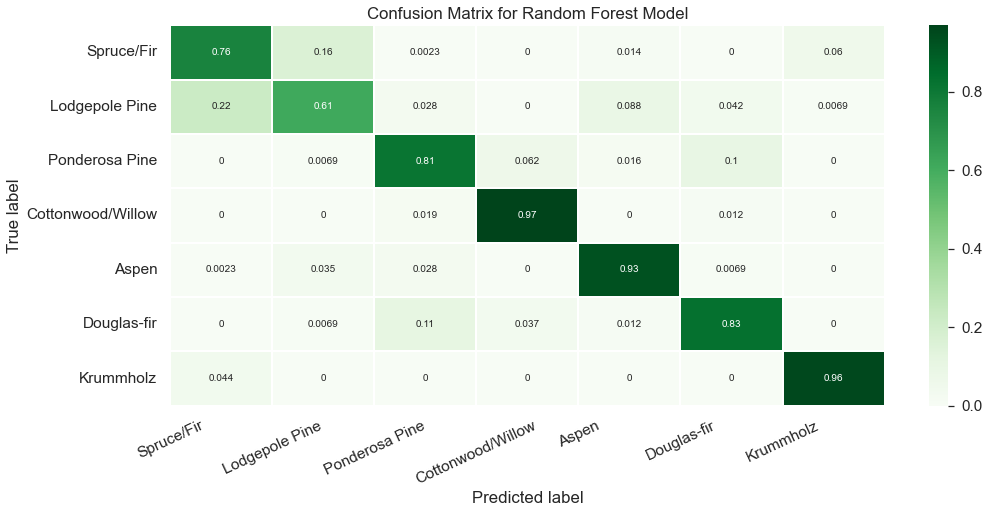

In [74]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_new, y_pred_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [75]:
print(classification_report(y_val_new, y_pred_test_forest))

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       432
           2       0.74      0.61      0.67       432
           3       0.81      0.81      0.81       432
           4       0.91      0.97      0.94       432
           5       0.88      0.93      0.90       432
           6       0.84      0.83      0.83       432
           7       0.93      0.96      0.95       432

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



### <font color=green> 7.1.2. Bagging <font>

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                               bootstrap=True, n_jobs = 1)
bag_clf.fit(X_train_new, y_train_new)
y_pred = bag_clf.predict(X_val_new)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(bag_clf, X_train_new, y_train_new))))

In [ ]:

X = X_train_new
y = y_train_new
tree_1 = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_1, X, y))))

Get a low accuracy with correlated features, I try below with a different split set (taking out correlated features)

An even worse accuracy... Let's see how the tree looks like

### <font color=green> 7.1.3. XGBoost <font>

## <font color=green> 7.1.AdaBoostClassifier   <font>

In [ ]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_new, y_train_new, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



In [ ]:
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_new, y_train_new)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_new, y_train_new)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

## <font color=green> 7.1. Random Forest   <font>

## <font color=green> 7.1. XGB Boost  <font>

## <font color=green> 7.1. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 10 but will use iterations of 1. And it gives me the best K = 1. 

In [ ]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

p = 1 (Manhatten Distance), the best k = 8 with accuracy= 0.759259
p = 2 (Euclidean Distance), the best k = 1 with accuracy = 0.761905

Checking the best value for K and accuracy 

In [ ]:
test = results.sort_values('acc', ascending = False) 
test

In [ ]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
k_neighbors_list = range (1,40,1)

K_scores = []

for k in k_neighbors_list:
    # Run KNeighborsClassifier with k neighbours 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    # Obtain Cross_val_score for KneighborsClassifier with k neighbors 
    scores = cross_val_score(knn,X_train_new, y_train_new, cv= 5, scoring= "accuracy")
    # Append mean of scores for K neighbors to k_scores list 
    K_scores.append({
        "k": k,
        "acc": scores.mean
    })
    
results = pd.DataFrame(K_scores)

In [ ]:
#test = results.sort_values(K_scores, ascending = False) 
#test

Using Grridsearch and cross validation we will adapt the model. <br>
We first create a KNN classifier instance and then prepare a range of values of hyperparameter K from 1 to 31 that will be used by GridSearchCV to find the best value of K.

Furthermore, we set our cross-validation batch sizes cv = 5 and set scoring metrics as accuracy as our preference.

In [ ]:
cross_valid_scores = {}
parameters = {
    "n_neighbors": list(range(1,20,1)),
    "leaf_size":list(range(1,100,20)),
    "metric":["euclidean","manhattan"]    
}

model_KNN = KNeighborsClassifier()

model_KNN = GridSearchCV(
    model_KNN,
    parameters,
    cv=5,
    scoring = "accuracy"

)
KNN_results = model_KNN.fit(X_train_new, y_train_new)

In [ ]:
KNN_results.best_score_
KNN_results.best_estimator_
KNN_results.best_params_

In [ ]:
accuracy = KNN_results.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Using the best model to calculate the mean cross validation score to compare the model later with each other

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=1,metric='euclidean')

scores = cross_val_score(knn, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [ ]:
print("Accuracy = {0:.4f}\n".format(accuracy_score(model_KNN.predict(X_val_new), y_val_new)))
print("Classification Report")
print(classification_report(model_KNN.predict(X_val_new), y_val_new))

In [ ]:
plot_confusion_matrix(model_KNN,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [ ]:
classifiers_compare = classifiers_compare.append({'Algorithm': "KNN", 'Mean CV Score':(scores.mean())},ignore_index=True)

kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. 

## <font color=green> 7.1. SVM  <font>
The multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one. In scikit-learn one-vs-one is not default and needs to be selected explicitly (as can be seen further down in the code). One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.  The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’

In [ ]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(svm.SVC(C=10,kernel='rbf'))
ovr_clf.fit(X_train_new, y_train_new)
print("SVM Accuracy = {:.4f}".format(np.mean(cross_val_score(ovr_clf, X_train_new, y_train_new))))

The Model output is not very good, lets fine tune the SVM parameters to further improve the model performance. 
_C_ is the balance between margin violations (low C) or better generalization of the models. _Gamma_ acts like a regularization hyperparamter. If the model is overfitting it is advisable to redeuce it.If it is underfitting you should increase it. The best Kernel to use if the dataset is large is _Gaussoan RBF kernel_. Since we already used Polynominal in our dataset we will disregard this option. 

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


model_to_set = OneVsRestClassifier(SVC(kernel="rbf"))

parameters = {
    "estimator__C": [1,10,100],
    "estimator__gamma":[0.01,0.0001,0.00001],
}

estimator = GridSearchCV(model_to_set, param_grid=parameters, cv=5, n_jobs=-1)

estimator.fit(X_train_new, y_train_new)

print(estimator.best_score_)
print (estimator.best_params_)

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(parameters['estimator__C']), len(parameters['estimator__gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(parameters['estimator__gamma'])), parameters['estimator__gamma'], rotation=45)
plt.yticks(np.arange(len(parameters['estimator__C'])), parameters['estimator__C'])
plt.title('Validation accuracy')
plt.show()

In [ ]:
final_model = estimator.best_estimator_
Y_pred = final_model.predict(X_val_new)
print("Training set score for SVM: %f" % final_model.score(X_train_new , y_train_new))
print("Testing  set score for SVM: %f" % final_model.score(X_val_new  , y_val_new ))

In [ ]:
scores = cross_val_score(final_model, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [ ]:
print(classification_report(final_model.predict(X_val_new), y_val_new))

In [ ]:
plot_confusion_matrix(final_model,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [ ]:
classifiers_compare = classifiers_compare.append({'Algorithm': "SVM", 'Mean CV Score':(scores.mean())},ignore_index=True)

## <font color=green> 7.1. Naive Bayes  <font>

Since we have a classification problem with multiple discrete values we use the multinominal Naive Bayes method

## <font color=green> 6.6. Logistic Regression <font>

In [69]:
df_logist.shape

(15120, 10)

In [70]:
y_train_new.shape

(12096,)

In [71]:
y_train_log = y_train_log.values.ravel()
y_val_log = y_val_log.values.ravel()

In [72]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.05,0.06,0.08,1,2,3,5,10]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(X_train_log, y_train_log)
    y_pred = logreg.predict(X_val_log)
    scores_logreg.append(metrics.accuracy_score(y_val_log,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

NameError: name 'LogisticRegression' is not defined

## <font color=green> 6.6. Ensemble methods<font>
### <font color=green> 6.6. Voting Classifier<font>
    
A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 2000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(gamma ='auto', probability = True)
dtc_clf = DecisionTreeClassifier()

estimator = []
estimator.append(('LR', log_clf))
estimator.append(('RF', rnd_clf))
estimator.append(('SVC', svm_clf))
estimator.append(('DTC', dtc_clf))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(X_train_new, y_train_new)
y_pred = vot_hard.predict(X_val_new)

for clf in (log_clf,rnd_clf,dtc_clf, vot_hard):
    clf.fit(X_train_new, y_train_new)
    y_pred = clf.predict(X_val_new)
    print(clf.__class__.__name__, accuracy_score(y_val_new,y_pred))
  

In [ ]:
classifiers_compare

## <font color=green> 6.6. Ensemble methods<font>

## <font color=purple> 6.6. Dimensionality reduction with PCA <font>

Principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. We are running it on the dataset where we have all seleted features and will use PCA to identify the most important features. For the visualization part we are using https://plotly.com/python/pca-visualization/. 

Using the first 2 principle components show that the data with 2 PCAs is very well deferiantiated. We are using all features to test it against the initial selected features from the previous models. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import metrics


# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=2)

# Train lda on the first half of the digits
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new,)

In [ ]:
#Use Plotly visualisation package 
# To produce an interactive chart 
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = '',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train_new['Cover_Type'],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = dict(title = 'LDA (Linear Discriminant Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

With only two PCA you can nicely see how well the data is differentiated among the different Cover Types. 

In [73]:
# First we will observe with a 3D Diagram the first three PCAs
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(X_train_new)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train_new['Cover_Type'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Run PCA that holds 95% of all variance of the data 
from sklearn.decomposition import PCA
pca = PCA()
x_fit = pca.fit(X_train_new)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

Looking at the two first PCA to see if these can explain the dataset.You can set the components to the ratio of variance you wish to preserve

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# of Principle Components", "y": "Cumulative Explained Variance"})

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

In [ ]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

On top of that, we can also look at the combinations of variables that created each principal component with pca. We could use a heat map to showcase the correlation betweem the PCAs between each other. 

In [ ]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train_new.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [ ]:
pca_ratio = pca.explained_variance_ratio_
pca_ratio_tranposed = list(map(list, zip(*[pca_ratio])))
df = pd.DataFrame(data = np.array(pca_ratio_tranposed), columns = ['PCA Variance Explained'])
df['PCA Variance Explained Cumulative'] = df['PCA Variance Explained'].cumsum()
df.index += 1
df

Looks Like most variance (99.1%) is explained once we reach 12 principal components, so let’s create training and validation data sets using the first 12 principal components

In [ ]:
pca_mod = PCA(n_components=12)
PCA_X_train_final_selected = pca_mod.fit_transform(X_train_new)
PCA_X_val_final_selected = pca_mod.fit_transform(X_val_new)
print("Size of the dimensionality reduced training dataset", PCA_X_train_final_selected.shape)
print("Size of the dimensionality reduced training dataset", PCA_X_val_final_selected.shape)

In [ ]:
PCA_X_train_final_selected[0]

Check which most important features were selected using PCA. 

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca_mod = PCA(n_components=12)

model = pca_mod.fit(X_train_new)
X_pc = model.transform(X_train_new) 

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train_new.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
df

# Everything Together

Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,19)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X_train_new, y_train_new);

In [ ]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')

As can be seen in the graph, the optimal number of PCs to select will 12 as this gives us the optimal CV score. The optimum is 12 and increasing the number of features does not add much value. 

Source codes: https://www.kaggle.com/code/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne, https://github.com/dasaditi/machineLearning/blob/master/forestCover/ForestCover.ipynb

## <font color=purple> Random Forest with PCA<font>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Fine tuning the model and checking the performance of the PCA method

In [ ]:
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_rf = dict(n_estimators=n_estimators,criterion=criterion)

# instantiate and fit the grid
rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy' ,return_train_score=False)

grid_rf.fit(PCA_X_train_final_selected, y_train_new)

In [ ]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_rf.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_rf.best_params_)

In [ ]:
rf_final = RandomForestClassifier(criterion=grid_rf.best_params_['criterion'],
                            n_estimators=grid_rf.best_params_['n_estimators'])
rf_final.fit(PCA_X_train_final_selected,y_train_new)
rf_score=rf_final.score(PCA_X_val_final_selected,y_val_new)

print("The accuracy score of the RandomForest with reduced feature set: ",round(rf_score,2))

With cross validation you can see it overfits the train data und the result of the validation data is lower

In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(rf_final, PCA_X_val_final_selected, y_val_new))))

As you can see the model is overitting on the Training Set and has a lower score on the cross validation score.

In [ ]:
#the plot learning curve from sklearn works only if you add the definition of sklearn 


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:

cv = ShuffleSplit(n_splits=500, test_size=0.2, random_state=0)
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(rf_final, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()


# <font color=purple> AdaBoost with PCA reduced Dataset<font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),algorithm='SAMME')

parameters = {'base_estimator__max_depth':[i for i in range(2,6,2)],
              'base_estimator__min_samples_leaf':[1,5],
              'n_estimators':[250,500,750],
              'learning_rate':[0.01,0.1]}

grid_ada_PCA = GridSearchCV(abc, parameters,verbose=1,scoring='neg_mean_squared_error',n_jobs=-1,cv=3)
grid_ada_PCA.fit(PCA_X_train_final_selected, y_train_new)


In [ ]:
#Estimator that was chosen by the search, i.e. estimator which gave highest score 
grid_ada_PCA.best_estimator_

In [ ]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_ada_PCA.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_ada_PCA.best_params_)


In [ ]:
ada_final_PCA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,min_samples_leaf=1),
                            learning_rate=grid_ada_PCA.best_params_['learning_rate'],
                         n_estimators=grid_ada_PCA.best_params_['n_estimators'])

ada_final_PCA.fit(PCA_X_train_final_selected,y_train_new)
ada_acc_sel =ada_final_PCA.score(PCA_X_val_final_selected,y_val_new)
print("The accuracy score of the AdaBoostClassifier with PCA reduced feature set: ",round(ada_acc_sel,2))


## <font color=purple> Logistic Regression with PCA<font>

In [ ]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.05,0.06,0.08,1,2,3,5,10]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(PCA_X_train_final_selected, y_train_new)
    y_pred = logreg.predict(PCA_X_val_final_selected)
    scores_logreg.append(metrics.accuracy_score(y_val_new,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curves Logistic Regression with PCA reduced dataset)"
plot_learning_curve(logreg, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

An important hyperparameter for Adaboost is n_estimator. Often by changing the number of base models or weak learners we can adjust the accuracy of the model. The number of trees added to the model must be high for the model to work well, often hundreds, if not thousands

In [ ]:
#Using a code from medium for adaboost 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_new, y_train_new)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))